# Вариант №7
### Точка 4
##### Месяцы 7, 8, 9

In [7]:
import pandas as pd

data = pd.DataFrame({7: [12.8, 12.9, 12.1, 12.4, 11.8, 11.6, 11.5, 11.6, 12.3, 11.9, 11.6, 12.2, 11.4, 10.8, 11.8, 10.5, 10.7, 11.5, 10.5, 11.1, 11.8, 11.1, 10.5, 11.5, 11.3, 11.2, 10.6, 11.5, 11.0, 11.4, 11.9, 10.8, 11.5, 11.5, 12.7, 11.2, 10.4],
                     8: [13.3, 13.4, 12.4, 13.2, 12.0, 12.3, 12.1, 11.8, 12.7, 12.6, 12.0, 13.1, 11.8, 11.5, 12.9, 11.3, 11.5, 12.2, 11.2, 10.6, 11.6, 11.1, 10.7, 12.4, 11.1, 12.3, 11.2, 12.5, 11.8, 12.0, 13.1, 11.7, 12.0, 11.9, 12.9, 11.7, 11.6],
                     9: [11.8, 13.2, 11.7, 12.3, 11.5, 11.5, 11.3, 11.5, 11.7, 11.8, 11.6, 12.2, 11.4, 11.6, 11.9, 11.1, 11.2, 11.1, 10.5, 10.5, 11.0, 11.3, 11.0, 12.4, 11.5, 10.4, 11.0, 11.3, 11.1, 11.6, 11.5, 11.6, 11.0, 11.0, 11.6, 10.6, 11.6]})
data.head()

,7,8,9
0,12.8,13.3,11.8
1,12.9,13.4,13.2
2,12.1,12.4,11.7
3,12.4,13.2,12.3
4,11.8,12.0,11.5


# Задание №1
### Проверка критерия Пирсона

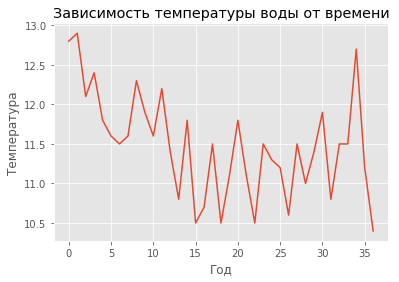

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

ax = data[7].plot(title='Зависимость температуры воды от времени')
q = ax.set(xlabel='Год', ylabel='Температура')

### 1.1
Не очень сильно похоже на нормальный закон распределения

### 1.2

In [10]:
import numpy as np

X1 = np.array(data[7])

X1.sort()
x_min, x_max = X1[0], X1[-1]
n = len(X1)
R = x_max - x_min

print('Размер выборки: ', n)
print('min: {}, max: {}'.format(x_min, x_max))
print('Размах выборки: ', R)

Размер выборки:  37
min: 10.4, max: 12.9
Размах выборки:  2.5


### 1.3

 Формула Стерджеса для определения числа интервалов N:
 
 
 
 $$ N = 1 + [3.322 lg n] = 1 + [log_2 n] $$

In [11]:
import math

N = 1 + math.floor(math.log2(n))

diap = np.linspace(x_min, x_max, N + 1)

h = R / N

print('Величина интервалов: ', h)

Величина интервалов:  0.4166666666666667


### 1.4

In [12]:
intervals = np.array([(diap[i-1], diap[i]) for i in range(1, N + 1)])
print(intervals)

[[10.4        10.81666667]
 [10.81666667 11.23333333]
 [11.23333333 11.65      ]
 [11.65       12.06666667]
 [12.06666667 12.48333333]
 [12.48333333 12.9       ]]


### 1.5

In [13]:
m = np.zeros(N,)

for i in X1:
    for (a1, a2), ind in zip(intervals, range(0, 6)):
        if a1 <= i <= a2:
            m[ind] += 1
            
w = m / len(X1)

print('Абсолютные частоты :', m)
print('Относительные частоты :', w)

Абсолютные частоты : [ 8.  5. 12.  5.  4.  3.]
Относительные частоты : [0.21621622 0.13513514 0.32432432 0.13513514 0.10810811 0.08108108]


### 1.6

In [14]:
middle = [(a1 + a2) / 2 for a1, a2 in intervals]
print(middle)

[10.608333333333334, 11.025, 11.441666666666666, 11.858333333333334, 12.275, 12.691666666666666]


### 1.7

(array([ 8.,  5., 12.,  5.,  4.,  3.]),
 array([10.4       , 10.81666667, 11.23333333, 11.65      , 12.06666667,
        12.48333333, 12.9       ]),
 <a list of 6 Patch objects>)

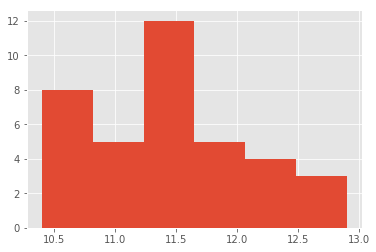

In [15]:
plt.hist(X1, bins = diap)

### 1.8

In [16]:
mean = 1 / n * sum(map(lambda m_i, x_i: m_i * x_i, m, middle)) 
std = math.sqrt(1 / n * sum(map(lambda m_i, x_i: m_i * (x_i - mean) ** 2, m, middle)))

print('Выборочное среднее: {} \nВыборочное среднее квадратичное отклонение: {}'.format(mean, std))

Выборочное среднее: 11.452927927927929 
Выборочное среднее квадратичное отклонение: 0.6314344940935217


### 1.9

In [17]:
z = (diap[:-1] - mean) / std
print(z)

[-1.66751728 -1.00764413 -0.34777098  0.31210216  0.97197531  1.63184846]


### 1.10

In [18]:
from scipy.stats import norm

normal_dist = norm(0,1)
P = []
for z_i in z:
    P.append(normal_dist.cdf(z_i) - sum(P))

m_ = np.array(P) * n
print(m_)

[1.76511445 4.03695426 7.66615668 9.56496129 7.84215094 4.22450121]


### 1.11

In [19]:
hi_2 = sum((m - m_) ** 2 / m_)
print(hi_2)

29.11914855583645


# Задание 2
### №2.1

In [23]:
x1_ = sum(data[7]) / n
x2_ = sum(data[8]) / n
x3_ = sum(data[9]) / n

print('Выборочное среднее для первого ряда: {} - {}'.format(x1_, data[7].mean()))
print('Выборочное среднее для второго ряда: {} - {}'.format(x2_, data[8].mean()))
print('Выборочное среднее для третьего ряда: {} - {}'.format(x3_, data[9].mean()))

Выборочное среднее для первого ряда: 11.483783783783782 - 11.483783783783782
Выборочное среднее для второго ряда: 12.040540540540539 - 12.040540540540539
Выборочное среднее для третьего ряда: 11.429729729729733 - 11.429729729729733


### №2.2

In [24]:
var1 = 1 / n * sum((data[7] - x1_) ** 2)
var2 = 1 / n * sum((data[8] - x2_) ** 2)
var3 = 1 / n * sum((data[9] - x3_) ** 2)

print('Выборочная дисперсия для первого ряда: {}'.format(var1))
print('Выборочная дисперсия для второго ряда: {}'.format(var2))
print('Выборочная дисперсия для третьего ряда: {}'.format(var3))

Выборочная дисперсия для первого ряда: 0.4175748721694668
Выборочная дисперсия для второго ряда: 0.5105186267348428
Выборочная дисперсия для третьего ряда: 0.2999269539810082


### №2.3

In [25]:
var1_ = 1 / (n-1) * sum((data[7] - x1_) ** 2)
var2_ = 1 / (n-1) * sum((data[8] - x2_) ** 2)
var3_ = 1 / (n-1) * sum((data[9] - x3_) ** 2)

print('Исправленная выборочная дисперсия для первого ряда: {} - {}'.format(var1_, data[7].var()))
print('Исправленная выборочная дисперсия для второго ряда: {} - {}'.format(var2_, data[8].var()))
print('Исправленная выборочная дисперсия для третьего ряда: {} - {}'.format(var3_, data[9].var()))

Исправленная выборочная дисперсия для первого ряда: 0.4291741741741742 - 0.4291741741741742
Исправленная выборочная дисперсия для второго ряда: 0.5246996996996995 - 0.5246996996996995
Исправленная выборочная дисперсия для третьего ряда: 0.3082582582582584 - 0.3082582582582585


### №2.4

In [26]:
std1 = np.sqrt(var1_)
std2 = np.sqrt(var2_)
std3 = np.sqrt(var3_)

print('Стандартное отклонение для первого ряда: {} - {}'.format(std1, data[7].std()))
print('Стандартное отклонение для второго ряда: {} - {}'.format(std2, data[8].std()))
print('Стандартное отклонение для третьего ряда: {} - {}'.format(std3, data[9].std()))

Стандартное отклонение для первого ряда: 0.6551138635185293 - 0.6551138635185293
Стандартное отклонение для второго ряда: 0.7243615807728206 - 0.7243615807728206
Стандартное отклонение для третьего ряда: 0.5552101028063686 - 0.5552101028063687


### №2.5

In [27]:
v1 = std1 / x1_
v2 = std2 / x2_
v3 = std3 / x3_

print('Коэф. вариации для первого ряда: {}'.format(v1))
print('Коэф. вариации для второго ряда: {}'.format(v2))
print('Коэф. вариации для третьего ряда: {}'.format(v3))

Коэф. вариации для первого ряда: 0.057046865027501975
Коэф. вариации для второго ряда: 0.0601602210742859
Коэф. вариации для третьего ряда: 0.0485759607562914


### №2.6

In [28]:
A1 = 1 / (n * (std1 ** 3)) * sum((data[7] - x1_) ** 3)
A2 = 1 / (n * (std2 ** 3)) * sum((data[8] - x2_) ** 3)
A3 = 1 / (n * (std3 ** 3)) * sum((data[9] - x3_) ** 3)

print('Коэф. асимметрии для первого ряда: {}'.format(A1))
print('Коэф. асимметрии для второго ряда: {}'.format(A2))
print('Коэф. асимметрии для третьего ряда: {}'.format(A3))

Коэф. асимметрии для первого ряда: 0.2747126164939736
Коэф. асимметрии для второго ряда: 0.08115105104189765
Коэф. асимметрии для третьего ряда: 0.6411814990802733


### №2.7

In [29]:
E1 = 1 / (n * (std1 ** 4)) * sum((data[7] - x1_) ** 4) - 3
E2 = 1 / (n * (std2 ** 4)) * sum((data[8] - x2_) ** 4) - 3
E3 = 1 / (n * (std3 ** 4)) * sum((data[9] - x3_) ** 4) - 3

print('Коэф. эксцесса для первого ряда: {}'.format(E1))
print('Коэф. эксцесса для второго ряда: {}'.format(E2))
print('Коэф. эксцесса для третьего ряда: {}'.format(E3))

Коэф. эксцесса для первого ряда: -0.5663866564919662
Коэф. эксцесса для второго ряда: -0.8002106256476886
Коэф. эксцесса для третьего ряда: 1.2770735874372017


### №2.8

In [31]:
Me1 = sorted(data[7])[round(n/2)]
Me2 = sorted(data[8])[round(n/2)]
Me3 = sorted(data[9])[round(n/2)]

print('Медиана для первого ряда: {} - {}'.format(Me1, data[7].median()))
print('Медиана для второго ряда: {} - {}'.format(Me2, data[8].median()))
print('Медиана для третьего ряда: {} - {}'.format(Me3, data[9].median()))


Медиана для первого ряда: 11.5 - 11.5
Медиана для второго ряда: 12.0 - 12.0
Медиана для третьего ряда: 11.5 - 11.5


### №2.9

In [32]:
Mode1 = data[7].mode()[:2]
Mode2 = data[8].mode()[:2]
Mode3 = data[9].mode()[:2]

print('Мода для первого ряда: {}'.format(Mode1))
print('Мода для второго ряда: {}'.format(Mode2))
print('Мода для третьего ряда: {}'.format(Mode3))

Мода для первого ряда: 0    11.5
dtype: float64
Мода для второго ряда: 0    12.0
dtype: float64
Мода для третьего ряда: 0    11.6
dtype: float64


# Задание №3
### №3.1

Text(0, 0.5, 'Y')

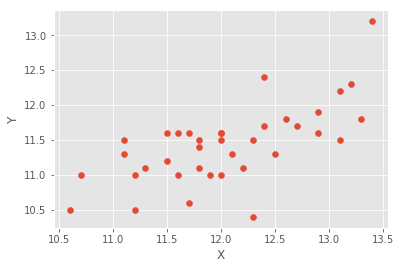

In [33]:
X = np.array(data[8])
Y = np.array(data[9])

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

### №3.2

In [34]:
S_xy = 1 / n * sum((X - x2_) * (Y - x3_))
r_xy = S_xy / std2 / std3

print('Ковариация :{} - {}'.format(S_xy, np.cov(X,Y)[0][1]))
print('Корреляция :{} - {}'.format(r_xy, np.corrcoef(X,Y)[0][1]))

Ковариация :0.26068663257852454 - 0.26792792792792797
Корреляция :0.6481954738767388 - 0.6662009037066481


### №3.3

In [35]:
from scipy import stats

alpha_1, alpha_2 = 0.025, 0.065

sigma = np.sqrt((1 - r_xy ** 2) / (n-2))
t_student = r_xy / sigma

stud = stats.t(n-2)

print('Среднеквадратичная ошибка лин. коэфф. корреляции: ', sigma)
print('t_кр для alpha = {} - {}'.format(alpha_1, stud.ppf(1-alpha_1)))
print('t_кр для alpha = {} - {}'.format(alpha_2, stud.ppf(1-alpha_2)))
print('t_рас =',t_student)

Среднеквадратичная ошибка лин. коэфф. корреляции:  0.12871259541493543
t_кр для alpha = 0.025 - 2.0301079282503425
t_кр для alpha = 0.065 - 1.5505744431080954
t_рас = 5.03599101383301


### №3.4

In [36]:
alpha = 0.05
y = 1 - alpha

z_y = abs(stats.norm.ppf(alpha/2))

a = 0.5 * np.log((1 + r_xy) / (1 - r_xy)) - z_y / np.sqrt(n - 3)
beta = 0.5 * np.log((1 + r_xy) / (1 - r_xy)) + z_y / np.sqrt(n - 3)

interv = ((np.exp(2 * a) - 1) / (np.exp(2 * a) + 1), (np.exp(2 * beta) - 1) / (np.exp(2 * beta) + 1)) 
print('Доверительный интервал для корреляции:', interv)

Доверительный интервал для корреляции: (0.4103643364256501, 0.8034646735564364)


# Задание №4
### №4.1

In [37]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X.reshape(-1,1), Y)

print("y = {:.2f}*x + {:.2f}".format(linear_regressor.coef_[0], linear_regressor.intercept_))

y = 0.51*x + 5.28


### №4.2

Text(0, 0.5, 'Y')

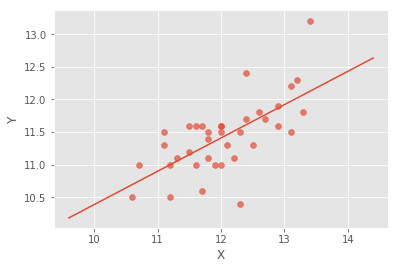

In [38]:
plt.scatter(X, Y, alpha = 0.7)
x = np.linspace(X.min()-1, X.max()+1, 50)

plt.plot(x, linear_regressor.predict(x.reshape(-1,1)))
plt.xlabel('X')
plt.ylabel('Y')

### №4.3

In [39]:
sigma_2 = var3_ * (1 - r_xy ** 2)
print('Дисперсия отклонения:', sigma_2)

Дисперсия отклонения: 0.17874127846195845


### №4.4

In [40]:
sigma_a = (sigma_2 ** 0.5) / (std2 * (n - 2) ** 0.5)
sigma_b = (sigma_2 ** 0.5) / ((n - 2) ** 0.5) * ((1 + x1_ ** 2 / var2_) ** 0.5)

print('Стандартные случайные погрешности a:', sigma_a)
print('Стандартные случайные погрешности b:', sigma_b)

Стандартные случайные погрешности a: 0.09865588572016414
Стандартные случайные погрешности b: 1.1351944410862336


### №4.5

In [41]:
T_a = linear_regressor.coef_[0] / sigma_a
T_b = linear_regressor.intercept_ / sigma_b

print('Критерий Стьюдента T для a:', T_a)
print('Критерий Стьюдента T для b:', T_b)
print('t_кр для alpha = {} : {}'.format(alpha_1, stud.ppf(1-alpha_1)))

Критерий Стьюдента T для a: 5.175879653106144
Критерий Стьюдента T для b: 4.652468672735567
t_кр для alpha = 0.025 : 2.0301079282503425


# Задание №5
### №5.1

In [42]:
y_predict = linear_regressor.predict(X.reshape(-1,1))

### №5.2

Text(0, 0.5, 'Температура воды, $\\degree C$')

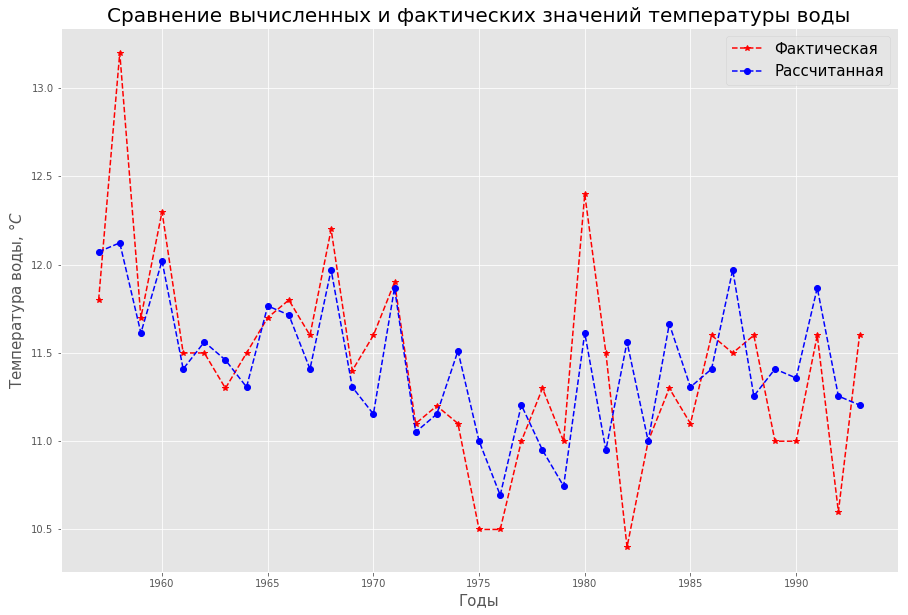

In [43]:
date = np.arange(1957, 1994)

plt.figure(figsize=(15, 10))
plt.plot(date, Y, 'r--*', label='Фактическая')
plt.plot(date, y_predict, 'b--o', label='Рассчитанная')
plt.legend(fontsize=15)
plt.title('Сравнение вычисленных и фактических значений температуры воды', fontsize=20)
plt.xlabel('Годы', fontsize=15)
plt.ylabel('Температура воды, $\degree C$', fontsize=15)

### №5.3

In [44]:
sigma2_ = 1 / n * sum((y_predict - x3_) ** 2)
print('Объясненная уравнением регрессии дисперсия:', sigma2_)

Объясненная уравнением регрессии дисперсия: 0.1331146736795303


### №5.4

In [45]:
D_ = 1 / n * sum((y_predict - Y) ** 2)
print('Остаточная дисперсия:', D_)

Остаточная дисперсия: 0.1668122803014777


### №5.5

In [46]:
nu_2 = sigma2_ / var3
print('Коэффициент детерминации:', nu_2)
print('nu_2 - r_xy =', nu_2 - r_xy ** 2)

Коэффициент детерминации: 0.44382364409955405
nu_2 - r_xy = 0.023666271745264034


### №5.6

In [47]:
F_cr = (n-2) * sigma2_ / D_
print('F-критическое:', F_cr)
print('F-табличное:', 4.12)

F-критическое: 27.92967981951559
F-табличное: 4.12
